In [1]:
import sys
import os
import pandas as pd

In [2]:
# Append the project root path to sys.path
sys.path.append(os.path.abspath(".."))

In [5]:
# File path to the CSV
file_path = 'C:\\Users\\Hasan\\Desktop\\data science folder\\DoctorsET_data.csv'

# Load the CSV without headers
data = pd.read_csv(file_path)
print(data.head())


      Channel Title Channel Username   ID  \
0  Doctors Ethiopia       @DoctorsET  864   
1  Doctors Ethiopia       @DoctorsET  863   
2  Doctors Ethiopia       @DoctorsET  862   
3  Doctors Ethiopia       @DoctorsET  861   
4  Doctors Ethiopia       @DoctorsET  860   

                                             Message  \
0  https://youtu.be/5DBoEm-8kmA?si=LDLuEecNfULJVD...   
1  ዶክተርስ ኢትዮጵያ በ አዲስ አቀራረብ በ ቴሌቪዥን ፕሮግራሙን ለመጀመር ከ...   
2  ሞት በስኳር \n\nለልጆቻችን የምናሲዘው ምሳቃ ሳናቀው እድሚያቸውን ይቀን...   
3  ከ HIV የተፈወሰ ሰው አጋጥሟችሁ ያቃል ? ፈውስ እና ህክምና ?\n\nሙ...   
4  በቅርብ ጊዜ በሃገራችን ላይ እየተስተዋለ ያለ የተመሳሳይ ፆታ ( Homos...   

                        Date                 Media Path  
0  2023-12-18 17:04:02+00:00  photos/@DoctorsET_864.jpg  
1  2023-11-03 16:14:39+00:00  photos/@DoctorsET_863.jpg  
2  2023-10-02 16:37:39+00:00  photos/@DoctorsET_862.jpg  
3  2023-09-16 07:54:32+00:00  photos/@DoctorsET_861.jpg  
4  2023-09-01 16:16:15+00:00  photos/@DoctorsET_860.jpg  


In [13]:
data['Message'].fillna("No message", inplace=True)
data['Media Path'].fillna("No media", inplace=True)

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


C:\Users\Hasan\AppData\Local\Temp\ipykernel_20388\3528589958.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Message'].fillna("No message", inplace=True)
C:\Users\Hasan\AppData\Local\Temp\ipykernel_20388\3528589958.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [15]:
data.drop_duplicates(subset=['ID'], keep='first', inplace=True)


In [16]:
data['Channel Title'] = data['Channel Title'].str.strip().str.title()
data['Channel Username'] = data['Channel Username'].str.strip().str.lower()
data['Message'] = data['Message'].str.strip()


In [17]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Hour'] = data['Date'].dt.hour


In [18]:
import os

# Extract the filename from path
data['Media Filename'] = data['Media Path'].apply(lambda x: os.path.basename(x) if pd.notnull(x) else "No media")

# Check if files exist (optional)
data['Media Exists'] = data['Media Path'].apply(lambda x: os.path.exists(x) if pd.notnull(x) else False)


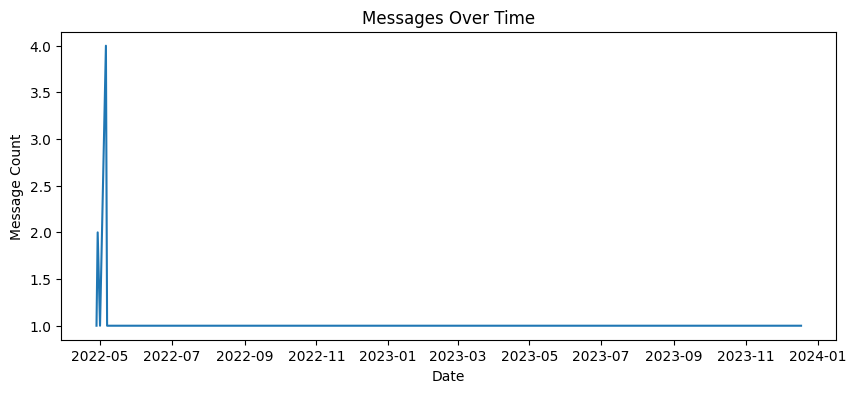

In [19]:
import matplotlib.pyplot as plt

data['Date'].dt.date.value_counts().sort_index().plot(kind='line', figsize=(10, 4), title="Messages Over Time")
plt.xlabel("Date")
plt.ylabel("Message Count")
plt.show()


In [20]:
from collections import Counter
import re

# Tokenize and count words
all_words = ' '.join(data['Message']).lower()
words = re.findall(r'\b\w+\b', all_words)
word_counts = Counter(words)

# Get the top 10 words
print(word_counts.most_common(10))


[('በ', 22), ('https', 15), ('youtu', 15), ('be', 15), ('ላይ', 14), ('ወይ', 11), ('ስፖርት', 11), ('ይመልከቱ', 9), ('si', 8), ('ውስጥ', 8)]


In [22]:
cleaned_file_path = 'C:\\Users\\Hasan\\Desktop\\data science folder\\DoctorsET_cleaned.csv'
data.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")


Cleaned data saved to C:\Users\Hasan\Desktop\data science folder\DoctorsET_cleaned.csv


In [26]:
from ultralytics import YOLO
import cv2
import os

# Load pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")  # "yolov8n.pt" is a lightweight pre-trained model


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Hasan\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:01<00:00, 4.33MB/s]


In [37]:
# Directory where images are stored
image_dir = "C:\\Users\\Hasan\\Desktop\\data science folder\\photos"
output_dir = "C:\\Users\\Hasan\\Desktop\\data science folder\\detected"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Filter dataset to only rows where media exists
df_images = data[data["Media Exists"] == True]

# Run YOLO on each image
for index, row in df_images.iterrows():
    image_path = os.path.join(image_dir, row["Media Filename"])
    
    # Check if image file exists
    if os.path.exists(image_path):
        print(f"Processing: {image_path}")
        
        # Run YOLO object detection
        results = model(image_path, save=True, save_dir=output_dir)
        
        # Save detected image path
        data.at[index, "Detected Image Path"] = os.path.join(output_dir, row["Media Filename"])
    else:
        print(f"File not found: {image_path}")

# Save the dataset with detected image paths
data.to_csv("C:\\Users\\Hasan\\Desktop\\DoctorsET_with_detections.csv", index=False)
print("Object detection complete!")


Object detection complete!


In [38]:
# Add an empty 'Detected Image Path' column if it's missing
if "Detected Image Path" not in data.columns:
    data["Detected Image Path"] = None


In [43]:
import os

output_dir = "C:\\Users\\Hasan\\Desktop\\data science folder\\photos"

# Check if the directory exists and contains images
if os.path.exists(output_dir) and len(os.listdir(output_dir)) > 0:
    print("✅ Detected images exist in:", output_dir)
else:
    print("❌ No detected images found! Re-run YOLO detection.")


✅ Detected images exist in: C:\Users\Hasan\Desktop\data science folder\photos


In [48]:
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")

# Test on a sample image from the web
results = model("https://ultralytics.com/images/zidane.jpg", show=True)

print("✅ YOLO model is working correctly!")



Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 c:\Users\Hasan\Desktop\EDA\Week7_Challenge_Document\notebooks\zidane.jpg: 384x640 2 persons, 1 tie, 292.4ms
Speed: 10.0ms preprocess, 292.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
✅ YOLO model is working correctly!


In [9]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\Hasan\\Desktop\\DoctorsET_with_detections.csv"
data = pd.read_csv(file_path)

# Display columns to verify
print("✅ Data loaded successfully!")
print(data.columns)


✅ Data loaded successfully!
Index(['Channel Title', 'Channel Username', 'ID', 'Message', 'Date',
       'Media Path', 'Year', 'Month', 'Day', 'Hour', 'Media Filename',
       'Media Exists', 'Detected Image Path'],
      dtype='object')


In [10]:
import os

image_dir = "C:\\Users\\Hasan\\Desktop\\data science folder\\photos"

# Check if sample images exist
sample_files = data["Media Filename"].dropna().unique()[:5]  # First 5 images

for filename in sample_files:
    image_path = os.path.join(image_dir, filename)
    if os.path.exists(image_path):
        print(f"✅ File exists: {image_path}")
    else:
        print(f"❌ File missing: {image_path}")


✅ File exists: C:\Users\Hasan\Desktop\data science folder\photos\@DoctorsET_864.jpg
✅ File exists: C:\Users\Hasan\Desktop\data science folder\photos\@DoctorsET_863.jpg
✅ File exists: C:\Users\Hasan\Desktop\data science folder\photos\@DoctorsET_862.jpg
✅ File exists: C:\Users\Hasan\Desktop\data science folder\photos\@DoctorsET_861.jpg
✅ File exists: C:\Users\Hasan\Desktop\data science folder\photos\@DoctorsET_860.jpg


In [11]:
import os
import cv2
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")

# Define directories
image_dir = "C:\\Users\\Hasan\\Desktop\\data science folder\\photos"
output_dir = "C:\\Users\\Hasan\\Desktop\\data science folder\\detected"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Run YOLO on all images and save detected images
for index, row in data.iterrows():
    if row["Media Exists"]:  # Process only valid images
        image_path = os.path.join(image_dir, row["Media Filename"])

        if os.path.exists(image_path):
            print(f"Processing image: {image_path}")

            # Run YOLO object detection
            results = model(image_path)

            # Save detected image in the output directory
            detected_image_path = os.path.join(output_dir, row["Media Filename"])
            results.save(filename=detected_image_path)  # Save detected image

            # Update DataFrame
            data.at[index, "Detected Image Path"] = detected_image_path
        else:
            print(f"❌ Skipping missing file: {image_path}")

# Save the updated dataset
data.to_csv("C:\\Users\\Hasan\\Desktop\\DoctorsET_with_detections.csv", index=False)
print("✅ YOLO detection complete! CSV updated with detected image paths.")


✅ YOLO detection complete! CSV updated with detected image paths.


In [18]:
import os
import pandas as pd
import nest_asyncio
import asyncio
from telethon import TelegramClient
import time

# Apply nest_asyncio to fix the event loop issue in Jupyter
nest_asyncio.apply()

# 🔑 Telegram API credentials (Replace with your own)
API_ID = "27904749"
API_HASH = "5d9f2efaa785a2c4d04b5043088c2813"
PHONE_NUMBER = "+251912026082"

# 🔗 Telegram channels to scrape
channels = [
    "https://t.me/DoctorsET",
    "https://t.me/lobelia4cosmetics",
    "https://t.me/yetenaweg",
    "https://t.me/EAHCI"
]

# 📂 Storage directory
output_dir = "C:\\Users\\Hasan\\Desktop\\data science folder"
os.makedirs(output_dir, exist_ok=True)

# 📌 Define the async function for scraping
async def scrape_telegram():
    for channel in channels:
        session_name = f"session_{channel.replace('https://t.me/', '')}"  # Unique session per channel
        async with TelegramClient(session_name, API_ID, API_HASH) as client:
            print(f"📥 Scraping data from {channel}...")

            # Get entity (channel ID)
            entity = await client.get_entity(channel)

            # Fetch messages
            messages = []
            async for message in client.iter_messages(entity, limit=500):  # Adjust limit as needed
                messages.append([
                    channel,
                    message.id,
                    message.date,
                    message.sender_id,
                    message.text,
                    message.photo.file_reference if message.photo else None
                ])

            # Save to CSV
            df = pd.DataFrame(messages, columns=["Channel", "Message_ID", "Date", "Sender_ID", "Text", "Media"])
            csv_path = os.path.join(output_dir, f"{channel.replace('https://t.me/', '')}.csv")
            df.to_csv(csv_path, index=False)
            print(f"✅ Data saved: {csv_path}")

    print("🚀 Scraping complete!")

# 🚀 Run the async function properly in Jupyter
asyncio.get_event_loop().run_until_complete(scrape_telegram())


Signed in successfully as Hasan Kere Obse; remember to not break the ToS or you will risk an account ban!
📥 Scraping data from https://t.me/DoctorsET...
✅ Data saved: C:\Users\Hasan\Desktop\data science folder\DoctorsET.csv
Signed in successfully as Hasan Kere Obse; remember to not break the ToS or you will risk an account ban!
📥 Scraping data from https://t.me/lobelia4cosmetics...
✅ Data saved: C:\Users\Hasan\Desktop\data science folder\lobelia4cosmetics.csv
Signed in successfully as Hasan Kere Obse; remember to not break the ToS or you will risk an account ban!
📥 Scraping data from https://t.me/yetenaweg...
✅ Data saved: C:\Users\Hasan\Desktop\data science folder\yetenaweg.csv
Signed in successfully as Hasan Kere Obse; remember to not break the ToS or you will risk an account ban!
📥 Scraping data from https://t.me/EAHCI...
✅ Data saved: C:\Users\Hasan\Desktop\data science folder\EAHCI.csv
🚀 Scraping complete!


In [19]:
import os
import pandas as pd
import nest_asyncio
import asyncio
from telethon import TelegramClient

# Apply nest_asyncio to fix the event loop issue in Jupyter
nest_asyncio.apply()

# 🔑 Telegram API credentials (Replace with your own)
API_ID = "27904749"
API_HASH = "5d9f2efaa785a2c4d04b5043088c2813"
PHONE_NUMBER = "+251912026082"

# 🔗 Telegram channels to scrape
channels = [
    "https://t.me/DoctorsET",
    "https://t.me/lobelia4cosmetics",
    "https://t.me/yetenaweg",
    "https://t.me/EAHCI"
]

# 📂 Storage directory
output_dir = "C:\\Users\\Hasan\\Desktop\\data science folder"
os.makedirs(output_dir, exist_ok=True)

# List to store all messages
all_messages = []

# 📌 Define the async function for scraping
async def scrape_telegram():
    for channel in channels:
        session_name = f"session_{channel.replace('https://t.me/', '')}"  # Unique session per channel
        async with TelegramClient(session_name, API_ID, API_HASH) as client:
            print(f"📥 Scraping data from {channel}...")

            # Get entity (channel ID)
            entity = await client.get_entity(channel)

            # Fetch messages
            async for message in client.iter_messages(entity, limit=500):  # Adjust limit as needed
                all_messages.append([
                    channel,
                    message.id,
                    message.date,
                    message.sender_id,
                    message.text,
                    message.photo.file_reference if message.photo else None
                ])

    # Save all collected messages to one CSV
    df = pd.DataFrame(all_messages, columns=["Channel", "Message_ID", "Date", "Sender_ID", "Text", "Media"])
    csv_path = os.path.join(output_dir, "all_channels_data.csv")
    df.to_csv(csv_path, index=False)
    print(f"✅ All data saved in: {csv_path}")

    print("🚀 Scraping complete!")

# 🚀 Run the async function properly in Jupyter
asyncio.get_event_loop().run_until_complete(scrape_telegram())


📥 Scraping data from https://t.me/DoctorsET...
📥 Scraping data from https://t.me/lobelia4cosmetics...
📥 Scraping data from https://t.me/yetenaweg...
📥 Scraping data from https://t.me/EAHCI...
✅ All data saved in: C:\Users\Hasan\Desktop\data science folder\all_channels_data.csv
🚀 Scraping complete!
